**Examples**

Under the Hood

How run_solve_ivp Works

In [5]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [6]:
from modsim import *

In [7]:
import numpy as np

def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    return dydt

In [8]:
init = State(y=1)
system = System(init=init, t_end=3)
results, details = run_solve_ivp(system, slope_func)
details

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7a7d81da9240>
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0

In [9]:
results.head()

,y
0.00,1.000000
0.03,1.000450
0.06,1.001801
0.09,1.004055
0.12,1.007217


In [10]:
len(results)

101

In [11]:
def slope_func(t, state, system):
    y, = state
    dydt = y * np.sin(t)
    evals.append((t, y, dydt))
    return dydt
evals = []
results2, details = run_solve_ivp(system, slope_func, dense_output=False)
results2

,y
0.000000,1.000000
0.000100,1.000000
0.001100,1.000001
0.011100,1.000062
0.111100,1.006184
1.111100,1.744448
2.343272,5.464568
3.000000,7.318271


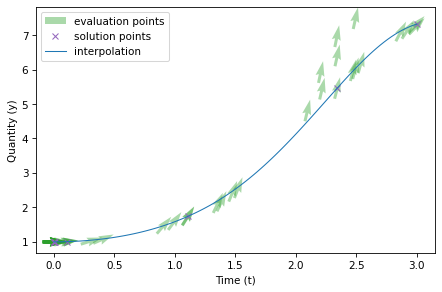

In [13]:
t, y, slope = np.transpose(evals)
theta = np.arctan(slope)
u = np.cos(theta)
v = np.sin(theta)

import matplotlib.pyplot as plt
plt.quiver(t, y, u, v, pivot='middle',
           color='C2', alpha=0.4, label='evaluation points')
results2['y'].plot(style='x', color='C4', label='solution points')
results['y'].plot(lw=1, label='interpolation')

decorate(xlabel='Time (t)',
         ylabel='Quantity (y)')